<a href="https://colab.research.google.com/github/Starleen1996/Machine-Learning/blob/main/Haga_Lo_que_hicimos_Clasificaci%C3%B3n_Datos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HAGA LO QUE HICIMOS - ANÁLISIS EXPLORATORIO

In [81]:
## Importamos la base de datos /content/churn.csv

In [82]:
import pandas as pd
import numpy as np
import plotly.express as px


In [83]:
datos = pd.read_csv('/content/churn.csv')

In [84]:
datos.head()

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,15634602,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


In [85]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [86]:
#eliminamos la columna de "ID_Cliente" ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

datos = datos.drop('id_cliente', axis=1)

In [87]:
datos.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


In [88]:
## Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
# Identificamos que comparando la variable sexo biologico respecto a la variable objetivo (retiro/permanencia). Las mujeres que se han retirado 3404 triplica las mujeres que permanecen en la compañia de servicios.
# Identificamos que por el lado de los hombres, 4559 se han retirado de la compañia, siendo 4.5 veces mayor a los que permanecen en la compañia de servicios.
px.histogram(datos, x='sexo_biologico', color='churn', text_auto=True,barmode='group')

In [89]:
## Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
# Evidenciamos que el pais de Francia se han retirado unos 4204 clientes de la compañia y permanecen unos 810 clientes aproximadamente. Una grafia muy similar a la relación (Hombres/Retirados)


px.histogram(datos, x='pais' , color='churn', text_auto=True, barmode='group')

## Analizando datos de variables Cuantitativas

In [90]:
# Realizamos diagrama de cajas (box) para variables cuantitativas respecto a la vatiable objetivo (churn)
# Vemos que el min de datos de las personas retiradas es de: 405 puntos y el de las personas que permanecen es de 350.
# El primer Q1 de las personas que permanecen es de 578 puntos y el de los clientes retirados es de 585.
# La mediana para las personas que permanecen es de 546 puntos y el de los clientes retirados es de 653.

px.box(datos, x='score_credito', color= 'churn')

In [91]:
# Realizamos diagrama de cajas (box) para variables cuantitativas respecto a la vatiable objetivo (churn)
px.box(datos, x='salario_estimado', color='churn')

In [92]:
# Realizamos diagrama de cajas (box) para variables cuantitativas respecto a la vatiable objetivo (churn)
px.box(datos, x='servicios_adquiridos', color='churn')
#servicios_adquiridos

In [93]:
# Realizamos diagrama de cajas (box) para variables cuantitativas respecto a la vatiable objetivo (churn)
px.box(datos, x='edad', color='churn')
#Edad

## HAGA LO QUE HICIMOS - TRANSFORMACIÓN DE DATOS

In [94]:
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


#### Variables Explicativas

In [95]:
#Definir variables explicativas (X) y de respuesta (y)

X = datos.drop('churn', axis=1)
y= datos['churn']

In [96]:
X

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52


In [97]:
y

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## Transformación Variable Explicativas (X)

In [98]:
from sklearn.compose import make_column_transformer  # Este modulo ayuda a realizar una transformación de columnas
from sklearn.preprocessing import OneHotEncoder # Ayuda a realizar transformación de 1 y 0

In [99]:
columnas = X.columns # Creamos una variable llamada columnas

In [100]:
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


In [101]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [102]:
X = one_hot.fit_transform(X)

In [103]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [104]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


## Transformación Varible Objetivo (y)

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
LabelEncoder = LabelEncoder()

In [107]:
# Hacemos una transformación de la variable de respuesta donde convertimos los "SI" en 1 y los "NO" en 0
y = LabelEncoder.fit_transform(y)

In [108]:
y

array([1, 0, 1, ..., 1, 1, 0])

## HAGA LO QUE HICIMOS - AJUSTES DE MODELOS

#### La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [109]:
#### Dividiendo los datos entre entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)



#### Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [110]:
# Modelo de referencia Baseline
from sklearn.dummy import DummyClassifier

In [111]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7964

#### El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [112]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [113]:
modelo_arbol = DecisionTreeClassifier(random_state=5) # max_depth=3 ajusta la profundidad a los niveles.
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [114]:
modelo_arbol.score(X_test,y_test)

0.7968

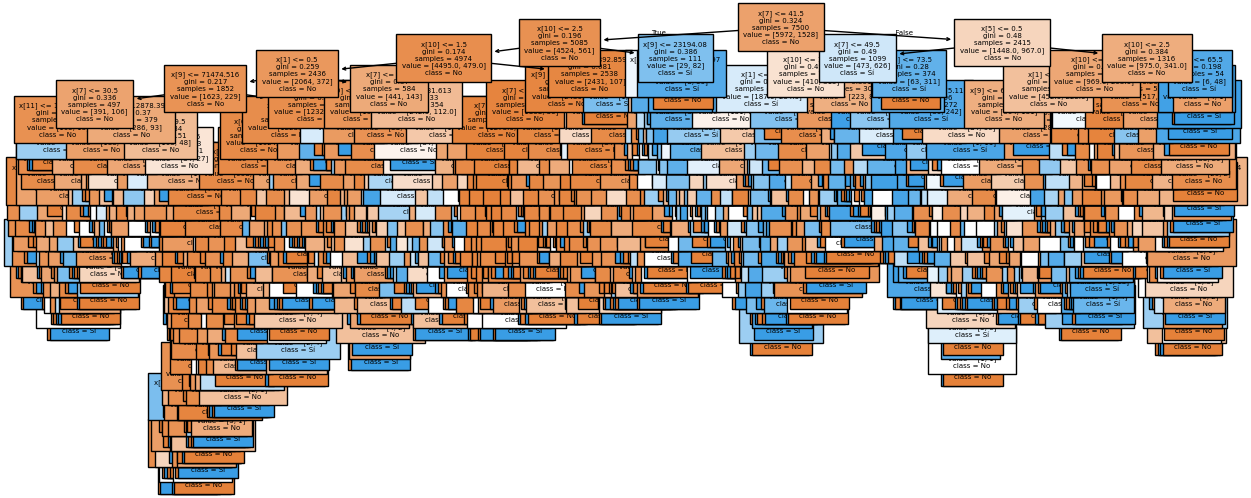

In [115]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['No', 'Sí'], fontsize = 5);

In [116]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=4) # max_depth=3 ajusta la profundidad a los niveles.
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [117]:
modelo_arbol.score(X_test,y_test)

0.8464

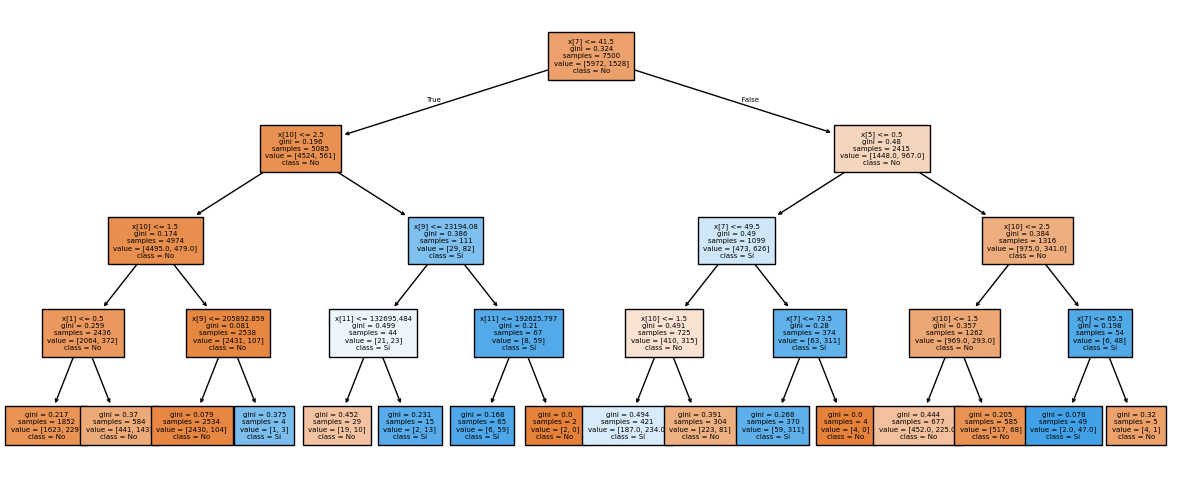

In [118]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['No', 'Sí'], fontsize = 5);

#### HAGAMOS LO QUE HICIMOS - SELECCION DE MODELOS



La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)


In [121]:
pd.DataFrame(X_train_normalizado) # Convertimos todos los datos de cada variable con valores de 0 a 1 para mantenerlos en una misma escala

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,0.0,1.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,1.0,0.0,0.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,1.0,0.0,0.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,1.0,0.0,1.0,0.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,1.0,0.0,1.0,0.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,1.0,0.0,1.0,0.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,1.0,0.0,0.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


#### Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
X_test_normalizado = normalizacion.transform(X_test)


In [126]:
knn.score(X_test_normalizado,y_test)

0.7964

#### Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimiento.

In [129]:
lista = [('dummy',dummy,X_test),('De Árbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f' La exactitud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

 La exactitud del modelo dummy: 0.7964
 La exactitud del modelo De Árbol: 0.8464
 La exactitud del modelo knn: 0.7964


In [130]:
import pickle # Esta biblioteca nos permite crear archivos binarios, el cual va contener nuestro modelo de machine learning  serializados listos para el consumo

In [131]:
with open('modelo_one_hot_encoder.pkl', 'wb') as archivo:  # Guardamos cada modelo de machine learning
  pickle.dump(one_hot, archivo)

In [132]:
with open('modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

In [133]:
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


In [161]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [162]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


In [163]:
modelo_one_hot = pd.read_pickle('/content/modelo_one_hot_encoder.pkl')
modelo_champion = pd.read_pickle('/content/modelo_champion.pkl')

In [164]:
modelo_arbol.predict(nuevo_dato)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



ValueError: could not convert string to float: 'Francia'

In [165]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)

In [166]:
modelo_champion.predict(nuevo_dato)
#Esto indica que la predicción fue el valor 0, que indica que no habrá churn. Por lo tanto, el cliente no dejará de utilizar los servicios.

array([0])